In [1]:
## Explain Data



Importing Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hmeq = pd.read_csv('hmeq.csv', delimiter = ",")
hmeq = hmeq.dropna()
hmeqnum = hmeq[['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']]
hmeqnum

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


Correlation Matrix

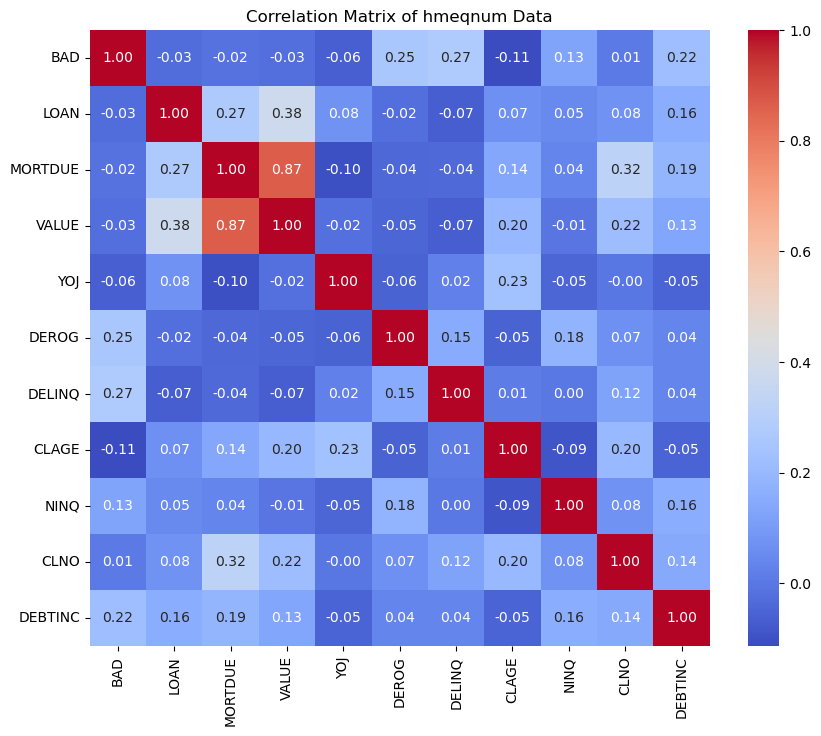

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = hmeqnum.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix of hmeqnum Data')

plt.show()


OLS

In [4]:
import statsmodels.api as sm

hmeqnum = sm.add_constant(hmeqnum)

y = hmeqnum['BAD']
X = hmeqnum.drop('BAD', axis=1)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     73.20
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          5.90e-136
Time:                        21:33:23   Log-Likelihood:                -218.50
No. Observations:                3364   AIC:                             459.0
Df Residuals:                    3353   BIC:                             526.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1063      0.024     -4.413      0.0

Visualizing Outliers

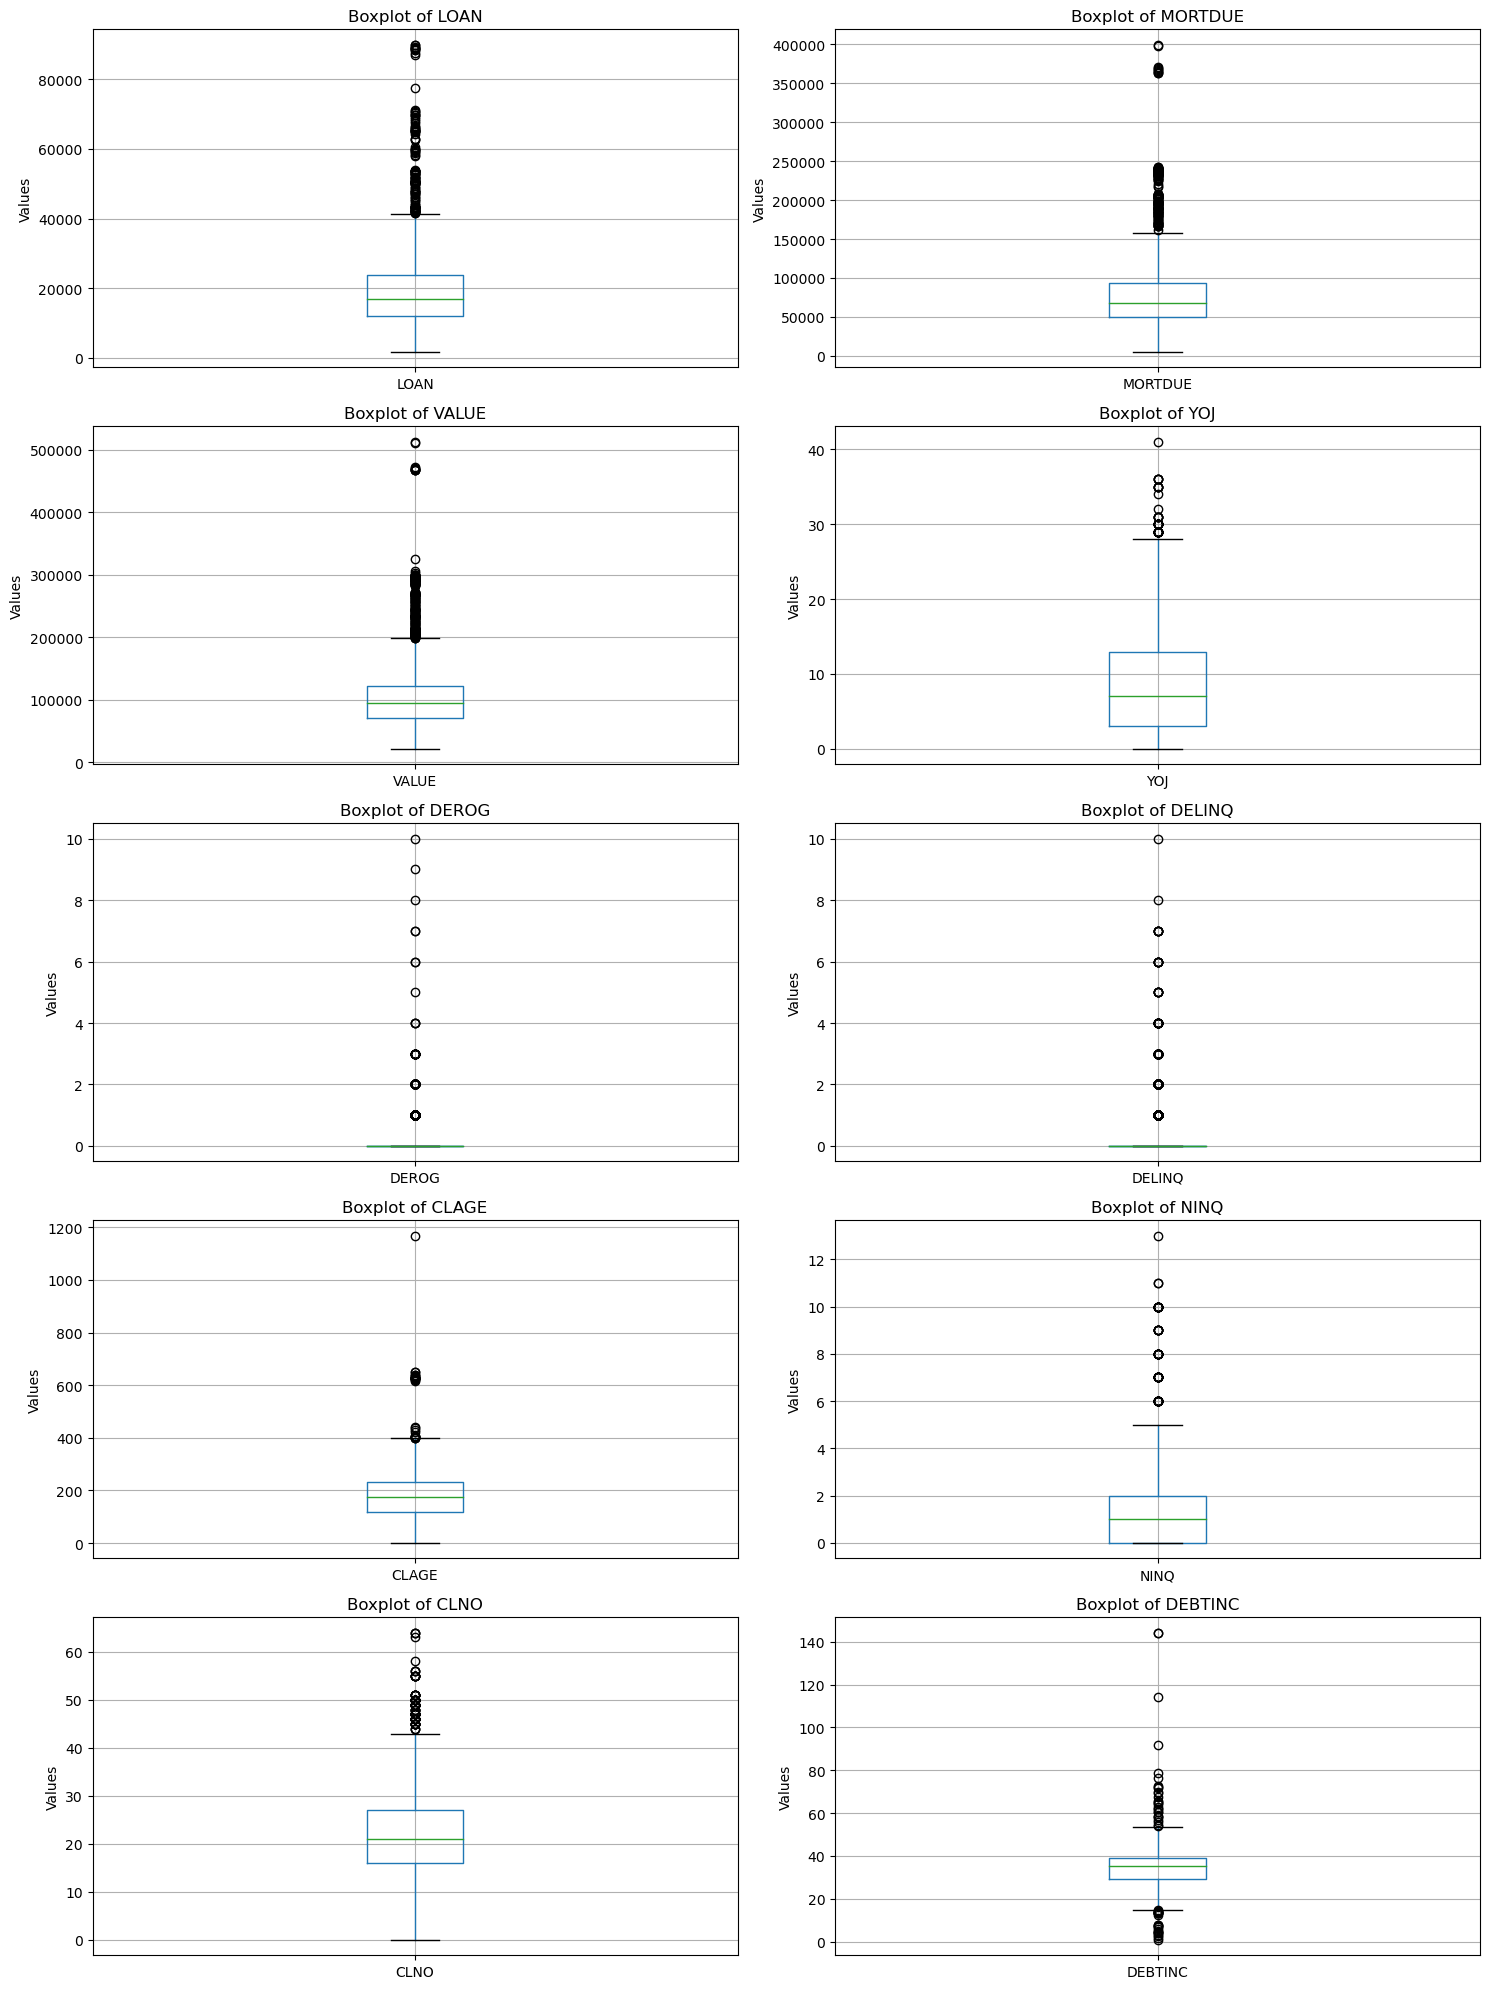

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

axes = axes.flatten()

hmeqnum.boxplot('LOAN', ax=axes[0])
axes[0].set_title('Boxplot of LOAN')
axes[0].set_ylabel('Values')

hmeqnum.boxplot('MORTDUE', ax=axes[1])
axes[1].set_title('Boxplot of MORTDUE')
axes[1].set_ylabel('Values')

hmeqnum.boxplot('VALUE', ax=axes[2])
axes[2].set_title('Boxplot of VALUE')
axes[2].set_ylabel('Values')

hmeqnum.boxplot('YOJ', ax=axes[3])
axes[3].set_title('Boxplot of YOJ')
axes[3].set_ylabel('Values')

hmeqnum.boxplot('DEROG', ax=axes[4])
axes[4].set_title('Boxplot of DEROG')
axes[4].set_ylabel('Values')

hmeqnum.boxplot('DELINQ', ax=axes[5])
axes[5].set_title('Boxplot of DELINQ')
axes[5].set_ylabel('Values')

hmeqnum.boxplot('CLAGE', ax=axes[6])
axes[6].set_title('Boxplot of CLAGE')
axes[6].set_ylabel('Values')

hmeqnum.boxplot('NINQ', ax=axes[7])
axes[7].set_title('Boxplot of NINQ')
axes[7].set_ylabel('Values')

hmeqnum.boxplot('CLNO', ax=axes[8])
axes[8].set_title('Boxplot of CLNO')
axes[8].set_ylabel('Values')

hmeqnum.boxplot('DEBTINC', ax=axes[9])
axes[9].set_title('Boxplot of DEBTINC')
axes[9].set_ylabel('Values')

plt.tight_layout()
plt.show()


In [6]:
# Re Add removing outliers + OLS
import pandas as pd

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

columns_to_clean = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

hmeqnum_cleaned = hmeqnum.copy()

for column in columns_to_clean:
    hmeqnum_cleaned = remove_outliers(hmeqnum_cleaned, column)

In [7]:
y_cleaned = hmeqnum_cleaned['BAD']
X_cleaned = hmeqnum_cleaned.drop('BAD', axis=1)

X_cleaned = sm.add_constant(X_cleaned)

model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

print(model_cleaned.summary())

                            OLS Regression Results                            
Dep. Variable:                    BAD   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.53
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           2.85e-19
Time:                        21:33:24   Log-Likelihood:                 320.86
No. Observations:                2149   AIC:                            -623.7
Df Residuals:                    2140   BIC:                            -572.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0599      0.028      2.106      0.0

In [8]:
y = hmeqnum['BAD']
X = hmeqnum.drop('BAD', axis=1)
 
X = sm.add_constant(X)
 
logit_model = sm.Logit(y, X)
 
logit_result = logit_model.fit()
 
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.234010
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3353
Method:                           MLE   Df Model:                           10
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.2216
Time:                        21:41:59   Log-Likelihood:                -787.21
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                 4.917e-90
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1389      0.431    -11.928      0.000      -5.983      -4.295
LOAN       -1.651e-05   7.68e

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
 
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]
 
threshold = 0.5
y_pred = (y_pred_proba > threshold).astype(int)
 
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9167904903417533


In [10]:
X_new = X.drop(['MORTDUE', 'VALUE', 'YOJ', 'NINQ'], axis=1)
 
logit_model_adjusted = sm.Logit(y, X_new)
logit_result_adjusted = logit_model_adjusted.fit()
 
print(logit_result_adjusted.summary())

Optimization terminated successfully.
         Current function value: 0.235982
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                          Logit   Df Residuals:                     3357
Method:                           MLE   Df Model:                            6
Date:                Mon, 08 Apr 2024   Pseudo R-squ.:                  0.2151
Time:                        21:42:00   Log-Likelihood:                -793.84
converged:                       True   LL-Null:                       -1011.3
Covariance Type:            nonrobust   LLR p-value:                 8.336e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0281      0.420    -11.964      0.000      -5.852      -4.204
LOAN       -1.189e-05   6.82e

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
 
logit_model_adjusted = LogisticRegression()
logit_model_adjusted.fit(X_train, y_train)
 
y_pred_proba_adjusted = logit_model_adjusted.predict_proba(X_test)[:, 1]
 
threshold = 0.5
y_adjusted = (y_pred_proba_adjusted > threshold).astype(int)
 
accuracy_new = accuracy_score(y_test, y_adjusted)
print("Accuracy of the new logistic regression model:", accuracy_new)

Accuracy of the new logistic regression model: 0.9316493313521546
